# **Product Analysis using Python for data analytics**

In the world of e-commerce, understanding how much time it takes for users to make a purchase on our website is vital. This analysis helps us see how efficient our website is and identify areas for improvement.

Our product manager wants us to measure and analyze the time from a user's first visit to their first purchase each day. This data will help us refine our marketing strategies and improve the overall user experience.

In this analysis, we'll explain our methods and share insights on user purchase times to enhance our website's performance and better understanding of users behavior.



## **1. Main Questions**

For the business to understand user purchase behavior and the times when they are purchasing the most is crucial so for that reason I raised a few questions.



**1.   How purchase times differ in different periods?**

- Analyzing how the time it takes for users to make their first purchase changes throughout the year can reveal seasonal patterns and highlight months when users tend to convert more quickly. This information can guide our inventory management, marketing campaign timing, and product launches.


**2.   How purchase times differ on weekdays?**

- Examining user purchase duration across weekdays can help us identify if specific days of the week are associated with faster or slower conversions. This insight can influence our promotional scheduling, customer engagement strategies, and staffing levels for customer support.


**3.   How do user purchase times differ in different parts of the day?**

- Splitting the day into segments, such as morning, afternoon, and evening, can reveal when users are more likely to make their first purchase. This information can be used to refine ad placement, email marketing schedules, and customer service availability for maximum impact.


**4.   How do purchase times differ per country and which country generated the most revenue?**

- Understanding how user purchase duration differs by country is crucial for tailoring our global strategy. Are there cultural or regional factors influencing this duration? By identifying these variations, we can optimize pricing, localization efforts, and customer support to improve user experiences.









## **2. Prepare &  Process**

- In the second part I went through the data source and checked what kind of data I have. In the provided raw_events table, I check that we have the data with each step how customers interact with our website, purchases amount geographical data and their initial purchases amount.

In here I will cover each step of how the data was prepared for futher analysis:  


- First of all the connection to the Google bigquery was established in order to retrieve the nesessary data for further analysis

In [18]:
#Connecting to Google BigQuery
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()

print('Authenticated')

Authenticated


In [19]:
#Selecting the project and the database in order to retrieve the nessesary data
project_id = 'tc-da-1'

client = bigquery.Client(project=project_id)
dataset_ref = client.dataset('turing_data_analytics', project = project_id)
dataset = client.get_dataset(dataset_ref)

In [20]:
#Returning the list of the tables from Database
tables = list(client.list_tables(dataset))

for i, table in enumerate(tables):
    print(i, table.table_id)

0 adsense_monthly
1 bank_loans_data
2 bank_loans_stats
3 heart_disease
4 raw_events
5 rfm
6 rfm_quantiles
7 rfm_score
8 rfm_value
9 stackoverflow_posts
10 subscriptions


In [21]:
#raw_events table is the second in list, it's object name:
print(tables[4])
print(tables[4].table_id)

#Selecting the Table from the Bigquery "turing_data_analytics" database
raw_events_data = tables[4]


raw_events


- Loading whole data to a data frame

In [22]:
#Loading the raw_events table to dataframe
raw_events_df = client.list_rows(raw_events_data).to_dataframe()

In [23]:
#Importing nesesary libraries for future use
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [24]:
raw_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4295584 entries, 0 to 4295583
Data columns (total 31 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   event_date                  object 
 1   event_timestamp             Int64  
 2   event_name                  object 
 3   event_value_in_usd          float64
 4   user_id                     object 
 5   user_pseudo_id              object 
 6   user_first_touch_timestamp  Int64  
 7   category                    object 
 8   mobile_model_name           object 
 9   mobile_brand_name           object 
 10  operating_system            object 
 11  language                    object 
 12  is_limited_ad_tracking      object 
 13  browser                     object 
 14  browser_version             object 
 15  country                     object 
 16  medium                      object 
 17  name                        object 
 18  traffic_source              object 
 19  platform             

##### **Purchases Dataframe**
- Creating new dataframe where only row retrieve with event_name equals 'puchase' as **Purchases** dataframe
- Filling the Nan value in purchases_revenue_in_usd with 0


In [25]:
#Creating DataFrame
raw_events = pd.DataFrame(raw_events_df)

#Creating Purchases Data frame
purchases_raw = raw_events[raw_events['event_name'] == 'purchase'].copy()

  # Converting event_timestam to datetime field and renaming to purchase_date
purchases_raw['purchase_datetime'] = pd.to_datetime(purchases_raw['event_timestamp'], unit='us')

  # Filling the missing purchase value will 0
purchases_raw['purchase_reveneu_in_usd'] = purchases_raw['purchase_revenue_in_usd'].fillna(0)

- Selecting the required field for further analysis

In [26]:
# Selecting only the purchases fields which will be user for futher analysis
purchases = purchases_raw.loc[:,[
    'user_pseudo_id','event_date',
    'purchase_datetime','country',
    'category',
    'mobile_brand_name',
    'purchase_revenue_in_usd']].set_index('user_pseudo_id')

In [27]:
purchases

,event_date,purchase_datetime,country,category,mobile_brand_name,purchase_revenue_in_usd
user_pseudo_id,,,,,,
91133314.4607314875,20210116,2021-01-16 08:46:14.898993,Italy,desktop,Microsoft,0.0
48117822.0979250402,20210129,2021-01-29 19:16:08.501970,Canada,tablet,Apple,0.0
53104811.8176614311,20210101,2021-01-01 14:10:49.233373,Philippines,tablet,Apple,137.0
55593768.5311544152,20201228,2020-12-28 02:23:12.580174,Singapore,desktop,Google,22.0
1270026.4390167050,20201215,2020-12-15 02:23:19.666006,United States,desktop,Google,44.0
...,...,...,...,...,...,...
2808102.2330574481,20201213,2020-12-13 15:53:35.315968,United States,desktop,Google,188.0
5395593.7397446796,20210125,2021-01-25 05:31:20.383390,United States,desktop,Google,35.0
18954300.0486555383,20201227,2020-12-27 05:40:43.658691,Germany,desktop,Google,40.0


##### **Page_views Dataframe**
- Creating new dataframe where only row retrieve with event_name equals 'page_views' as **Page_views** dataframe

In [28]:
#Creating Page_views Dataframe
page_views_raw = raw_events[raw_events['event_name'] == 'page_view'].copy()

# Converting event_timestamp to datetime field and renaming to purchase_date
page_views_raw['page_view_datetime'] = pd.to_datetime(page_views_raw['event_timestamp'], unit='us')

# Selecting only the purchases fields which will be user for futher analysis

page_views_data = page_views_raw.loc[:,['user_pseudo_id', 'event_date', 'page_view_datetime']]

# Creating a first page view column per user on separate days
min_page_view_date = page_views_data.groupby(['user_pseudo_id', 'event_date'])['page_view_datetime'].min().reset_index()

# Setting the user_pseuod_id as the index of the dataframe
page_views = min_page_view_date.set_index('user_pseudo_id')

In [29]:
page_views

,event_date,page_view_datetime
user_pseudo_id,,
10001363.4360935308,20201212,2020-12-12 04:11:17.508078
1000223163.8035209215,20210107,2021-01-07 18:35:34.089387
1000299.7413851356,20210120,2021-01-20 11:04:59.887247
1000300.3223254235,20201104,2020-11-04 09:21:11.657014
10003031.4607645453,20201211,2020-12-11 17:25:12.071831
...,...,...
9997317.3571391655,20210123,2021-01-23 07:52:59.890493
99974675.1893931687,20201105,2020-11-05 21:01:06.461822
9997700.2258881857,20210125,2021-01-25 21:47:10.828176


- Merging **purchases** and **page_views** dataframe together to receive the when user purchases data and users first page_view data on the same date as purhcases happened

In [30]:
joined_data = purchases.merge(page_views, on=['user_pseudo_id', 'event_date'], how='inner', )

In [31]:
joined_data


,event_date,purchase_datetime,country,category,mobile_brand_name,purchase_revenue_in_usd,page_view_datetime
user_pseudo_id,,,,,,,
91133314.4607314875,20210116,2021-01-16 08:46:14.898993,Italy,desktop,Microsoft,0.0,2021-01-16 08:38:59.198870
48117822.0979250402,20210129,2021-01-29 19:16:08.501970,Canada,tablet,Apple,0.0,2021-01-29 19:10:34.062355
53104811.8176614311,20210101,2021-01-01 14:10:49.233373,Philippines,tablet,Apple,137.0,2021-01-01 13:42:59.401920
55593768.5311544152,20201228,2020-12-28 02:23:12.580174,Singapore,desktop,Google,22.0,2020-12-28 02:21:33.407291
1270026.4390167050,20201215,2020-12-15 02:23:19.666006,United States,desktop,Google,44.0,2020-12-15 01:52:44.734648
...,...,...,...,...,...,...,...
4571790.4716367763,20210121,2021-01-21 20:57:51.232239,United States,desktop,Google,91.0,2021-01-21 20:42:16.098361
43954182.0581034502,20210127,2021-01-27 01:13:43.512133,Hong Kong,desktop,Google,0.0,2021-01-27 00:36:45.442338
7333732.4162222716,20210121,2021-01-21 11:54:10.907212,United States,desktop,Google,95.0,2021-01-21 11:47:07.300564


- Added weekdays column of purchaase date in order to get the full name of the weekday.

In [32]:
#Creating a new collumn of full name of the weekdays
joined_data['weekdays'] = joined_data['purchase_datetime'].dt.strftime('%A')

- Creating a new collumn day_parts using pandas cut funtion in order to create bins which returns particular part of the day

In [33]:
joined_data['day_parts'] = pd.cut(
    joined_data['purchase_datetime'].dt.hour,
    bins=[0,6,12,18,24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

- Creating a purchase time in sec field in order to have how long user spend from his first page_view till buyin actual product on the same day as the page_view and purchase happened

In [34]:
joined_data['purchase_time_in_sec'] = ((joined_data['purchase_datetime'] - joined_data['page_view_datetime']).dt.total_seconds()).round()

In [35]:
joined_data

,event_date,purchase_datetime,country,category,mobile_brand_name,purchase_revenue_in_usd,page_view_datetime,weekdays,day_parts,purchase_time_in_sec
user_pseudo_id,,,,,,,,,,
91133314.4607314875,20210116,2021-01-16 08:46:14.898993,Italy,desktop,Microsoft,0.0,2021-01-16 08:38:59.198870,Saturday,Morning,436.0
48117822.0979250402,20210129,2021-01-29 19:16:08.501970,Canada,tablet,Apple,0.0,2021-01-29 19:10:34.062355,Friday,Evening,334.0
53104811.8176614311,20210101,2021-01-01 14:10:49.233373,Philippines,tablet,Apple,137.0,2021-01-01 13:42:59.401920,Friday,Afternoon,1670.0
55593768.5311544152,20201228,2020-12-28 02:23:12.580174,Singapore,desktop,Google,22.0,2020-12-28 02:21:33.407291,Monday,Night,99.0
1270026.4390167050,20201215,2020-12-15 02:23:19.666006,United States,desktop,Google,44.0,2020-12-15 01:52:44.734648,Tuesday,Night,1835.0
...,...,...,...,...,...,...,...,...,...,...
4571790.4716367763,20210121,2021-01-21 20:57:51.232239,United States,desktop,Google,91.0,2021-01-21 20:42:16.098361,Thursday,Evening,935.0
43954182.0581034502,20210127,2021-01-27 01:13:43.512133,Hong Kong,desktop,Google,0.0,2021-01-27 00:36:45.442338,Wednesday,Night,2218.0
7333732.4162222716,20210121,2021-01-21 11:54:10.907212,United States,desktop,Google,95.0,2021-01-21 11:47:07.300564,Thursday,Morning,424.0


In [36]:
joined_data.describe()

,purchase_revenue_in_usd,purchase_time_in_sec
count,5691.000000,5691.000000
mean,63.638201,4740.767001
std,78.003553,10769.844927
min,0.000000,0.000000
25%,22.000000,624.500000
50%,44.000000,1228.000000
75%,80.000000,3031.000000
max,1530.000000,84371.000000


As now I have all the nesserary data for analysis I can move on and answer the main bussiness questions

## **3. Analyze & Share**


With the prepared data, I am now able to address key business questions by presenting relevant charts created using Python. This enables me to deliver the primary insights derived from the analysis

##### **- Main information**

First off all I created few number just to easily see the main information about the business to
bring attention.

**- How many unique customers purchased our products?**

---




In [37]:
nr_customers = joined_data.index.nunique()
print('We have', nr_customers, 'unique customers how bought something from us')

We have 4419 unique customers how bought something from us


**- How many purchases did we have from our users?**

In [38]:
nr_purchases = joined_data['purchase_datetime'].count()
print('Unique users purchased', nr_purchases, 'times' )

Unique users purchased 5691 times


**- How much revenue these purchases generated?**


In [39]:
revenue = joined_data['purchase_revenue_in_usd'].sum()
print('Total revenue generated from the purchases were', revenue , 'dollars' )

Total revenue generated from the purchases were 362165.0 dollars


**- What was the average order generated revenue?**


In [40]:
avg_revenue = joined_data['purchase_revenue_in_usd'].mean().round()
print('From all the purchases we can see that the average order value is', avg_revenue , 'dollars' )

From all the purchases we can see that the average order value is 64.0 dollars


**- What customers average time from the purchase and the page view on the same day as the purchase was made.**

In [41]:
avg_purchase_time_minutes = (joined_data['purchase_time_in_sec'].mean() / 60).round()
print('Average time from all purchases, from customers purchase and page view of the same day was on average', avg_purchase_time_minutes, 'minutes.')

Average time from all purchases, from customers purchase and page view of the same day was on average 79.0 minutes.


**- How purchase times differ in different periods?**

Here we can see the daily average times of how long on average customers are spending their time till the initial purchase and how much revenue they are generating.



<ipython-input-42-fab3fe7d5684>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(grouped_data['purchase_date'], rotation=90)


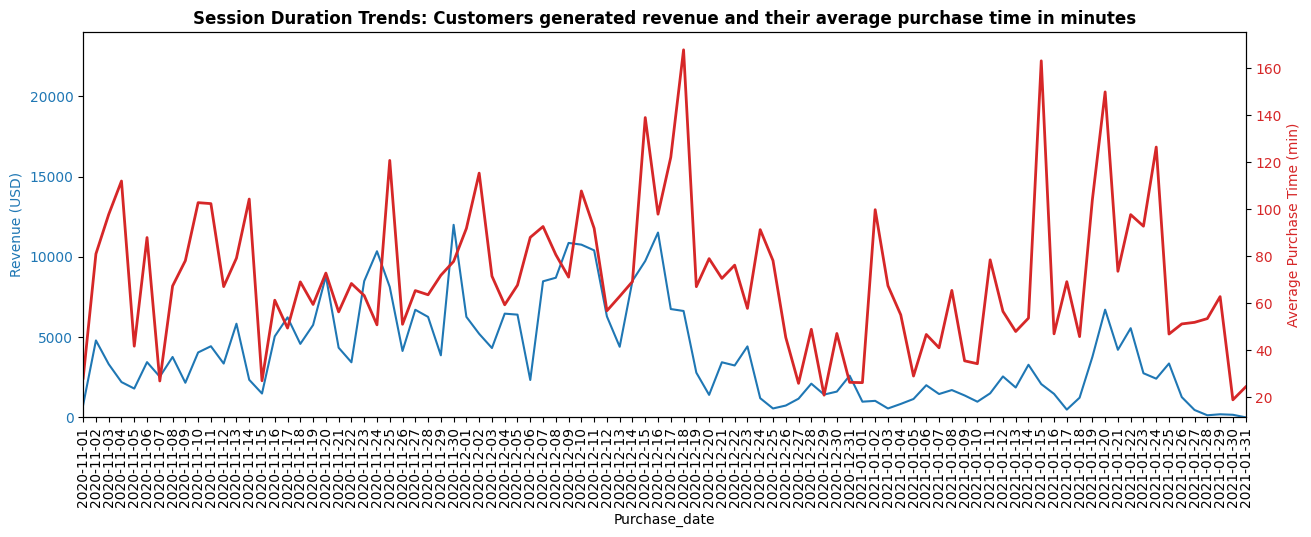

In [42]:
# Extract purchase_date from 'purchase_datetime'
joined_data['purchase_date'] = joined_data['purchase_datetime'].dt.to_period('D')

# Converting the purchase time in second to Minutes
joined_data['purchase_time_in_minutes'] = joined_data['purchase_time_in_sec'] / 60

# Grouping by purchase_date and calculate purchase_revenue_in_usd and average purchase time in minutes
grouped_data = joined_data.groupby('purchase_date').agg({'purchase_revenue_in_usd': 'sum', 'purchase_time_in_minutes': 'mean'}).reset_index()

# Convert purchase_date to string for the chart horizontal axis
grouped_data['purchase_date'] = grouped_data['purchase_date'].astype(str)

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.plot(grouped_data['purchase_date'], grouped_data['purchase_revenue_in_usd'], color=color)
ax1.set_xlabel('Purchase_date')
ax1.set_ylabel('Revenue (USD)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(grouped_data['purchase_date'], grouped_data['purchase_time_in_minutes'], color=color, linewidth = 2)
ax2.set_ylabel('Average Purchase Time (min)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

#Setting the horizontal axis start and end times, to clearly state from where it starts
ax1.set_xlim(grouped_data['purchase_date'].min(), grouped_data['purchase_date'].max())

plt.title('Session Duration Trends: Customers generated revenue and their average purchase time in minutes', fontweight='bold')

ax1.set_ylim(0, max(grouped_data['purchase_revenue_in_usd']) * 2)

#Setting puchase date labels to verticaly to clearly see the pruchase dates
ax1.set_xticklabels(grouped_data['purchase_date'], rotation=90)

plt.show()


- From the chart we can see that before the Christmas period people are spending more time looking for the perfect gifts, but spending not that much of the money.
- Next we can see that customers time after christmas time increases again, it might indicate that there might be some post celebration discounts and people spends more time  looking for the product before purchasing


**- How purchase times differ on weekdays?**

Here I created a chart where we can see at which days people tend to buy more and spend more time on the website searching for the product till buying it.



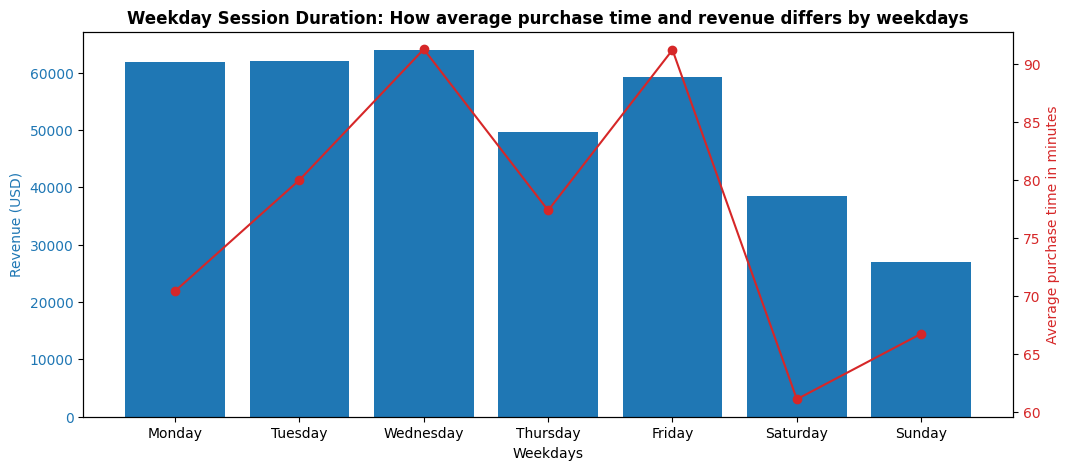

In [43]:
# Creating weekdays ordered list for ordering the charts
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Converting the purchase time in second to Minutes
joined_data['purchase_time_in_minutes'] = joined_data['purchase_time_in_sec'] / 60

# Grouping by purchase_date and calculate purchase_revenue_in_usd and average purchase time in minutes
grouped_data = joined_data.groupby('weekdays').agg({'purchase_revenue_in_usd': 'sum', 'purchase_time_in_minutes': 'mean'}).reset_index()

# Using the pandas categorical function ordering the weekdays by the created ordered list
grouped_data['weekdays'] = pd.Categorical(grouped_data['weekdays'], categories=weekday_order, ordered=True)

#Sorting the values of the grouped data by new sorted weekdays
grouped_data = grouped_data.sort_values('weekdays')

fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:blue'
ax1.bar(grouped_data['weekdays'], grouped_data['purchase_revenue_in_usd'], color=color)
ax1.set_xlabel('Weekdays')
ax1.set_ylabel('Revenue (USD)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for aveerage purchase time in minutes
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(grouped_data['weekdays'], grouped_data['purchase_time_in_minutes'],  color=color, marker='o', label='Average Puchase time in minutes')
ax2.set_ylabel('Average purchase time in minutes', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Weekday Session Duration: How average purchase time and revenue differs by weekdays', fontweight='bold')
plt.show()


- The chart above illustrates that, on average, people spend more time on the website leading to purchases of our product on Wednesdays and Fridays, generating a substantial amount of revenue. On weekends, we observe that people spend the least amount of time on the website, resulting in the lowest revenue. This trend may be attributed to individuals dedicating more time to socializing with friends and family during the weekends.



**- How do user purchase times differ in different parts of the day?**

As for the business, it is important to understand at what days people are spending the most of their time, it is important to at which part of the day people are spending their time.



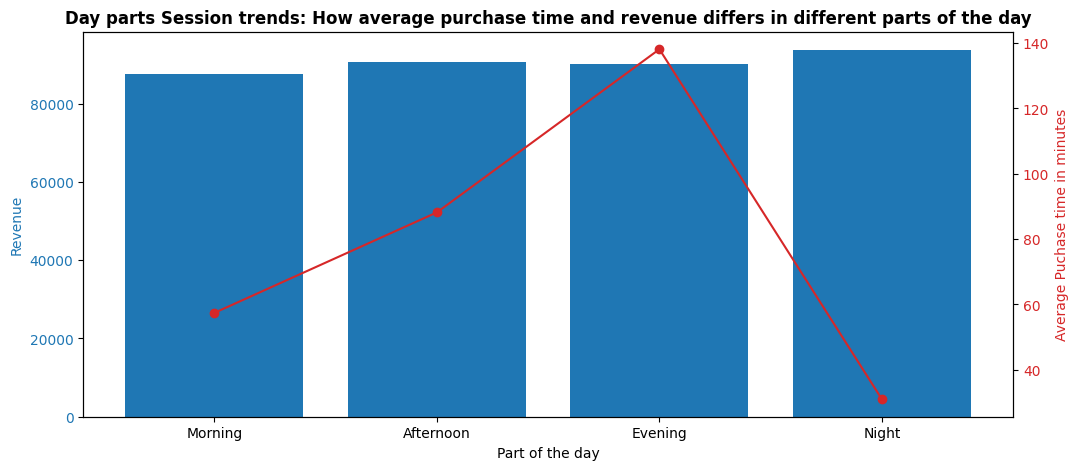

In [44]:
# Creating weekdays ordered list for ordering the charts
day_parts_order = ['Morning','Afternoon','Evening','Night']

# Converting the purchase time in second to Minutes
joined_data['purchase_time_in_minutes'] = joined_data['purchase_time_in_sec'] / 60

# Grouping by purchase_date and calculate purchase_revenue_in_usd and average purchase time in minutes
grouped_data = joined_data.groupby('day_parts').agg({'purchase_revenue_in_usd': 'sum', 'purchase_time_in_minutes': 'mean'}).reset_index()

# Using the pandas categorical function ordering the weekdays by the created ordered list
grouped_data['day_parts'] = pd.Categorical(grouped_data['day_parts'], categories=day_parts_order, ordered=True)

#Sorting the values of the grouped data by new sorted weekdays
grouped_data = grouped_data.sort_values('day_parts')


fig, ax1 = plt.subplots(figsize=(12,5))

color = 'tab:blue'
ax1.bar(grouped_data['day_parts'], grouped_data['purchase_revenue_in_usd'], color=color)
ax1.set_xlabel('Part of the day')
ax1.set_ylabel('Revenue', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for market share
ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(grouped_data['day_parts'], grouped_data['purchase_time_in_minutes'],  color=color, marker='o', label='Average Puchase time in minutes')
ax2.set_ylabel('Average Puchase time in minutes', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Adding labels and title
plt.title('Day parts Session trends: How average purchase time and revenue differs in different parts of the day',fontweight='bold')
plt.show()


- The chart above reveals that the revenue is generated relatively evenly across all parts of the day. However, there is a slight increase in revenue during the evenings. On average, people tend to spend more time searching for products during the evenings. Interestingly, even though people spend the least amount of time at night, the revenue data indicates that they are spending slightly more during that time.


**- How do purchase times differ per country and which country generates the most revenue?**


Understanding purchase durations by country is crucial for tailoring our global strategy. Identifying cultural or regional influences on these durations allows us to optimize pricing, localization, and customer support for improved user experiences.

In [45]:
import plotly.express as px

# Grouping by country and calculate purchase_revenue_in_usd as Total revenue
total_revenue_by_country = joined_data.groupby('country')['purchase_revenue_in_usd'].sum().reset_index()

map1 = px.choropleth(total_revenue_by_country,
                    locations='country',
                    locationmode='country names',
                    color='purchase_revenue_in_usd',
                    title='Total Purchase Revenue by Country',
                    color_continuous_scale='tealgrn',
                    labels={'country': 'Country', 'purchase_revenue_in_usd': 'Total Revenue'},
                    template='plotly_white')

#Seeting the map chart height, width to have a bigger map and setting the chart title in the middle
map1.update_layout(height=600, width=1200, title_x =0.5)
map1.show()


- From the chart above we can see that the most reveneu gererates United states, nearly 161 thousands from all of the sales

In [46]:

joined_data['purchase_time_in_minutes'] = joined_data['purchase_time_in_sec'] / 60

# Grouping by country and calculate average purchase time in minutes
total_revenue_by_country = joined_data.groupby('country')['purchase_time_in_minutes'].mean().reset_index()

map = px.choropleth(total_revenue_by_country,
                    locations='country',
                    locationmode='country names',
                    color='purchase_time_in_minutes',
                    title='Average purchase time by Country',
                    color_continuous_scale='tealgrn',
                    labels={'country': 'Country', 'purchase_time_in_minutes': 'Average purchase time'},
                    template='plotly_white')

#Seeting the map chart height, width to have a bigger map and setting the chart title in the middle
map.update_layout(height=600, width=1200, title_x =0.5)
map.show()

- From the previous chart we saw that United states are our top country from all the generated revenue and  its average puchase time is around 76 minutes from initial page_view to purchase
- On average time Armenia has the highest purchase time from all the countries

## **4. Key Insights**


After analyzing the data, we now know our customers better. Here are some important things we've learned:

-  On average, individuals spend 79 minutes from their initial view page to purchase, and they typically spend around $65 on their orders.

- Looking at the daily session duration times, it is evident that people, on average, spend more time both before the Christmas period, searching for potential presents for their loved ones, and in the post-celebration period when many shops announce discounts.

- More people tend to spend time on our website and make purchases on Wednesdays and Fridays, generating more revenue. On weekends, website activity and revenue drop, likely because people are busy socializing with friends and family. This suggests we should consider tailoring our marketing efforts to capitalize on the peak days for customer engagement and purchases.

- Revenue is fairly consistent throughout the day, but there's a small increase in the evening. People generally spend more time searching for products in the evening. Surprisingly, even though less time is spent at night, the data shows slightly higher spending during that period, indicating potential opportunities for optimizing evening engagement strategies.

- The United States has the most customers which generated the most revenue and the average time on till their initial purchases is 76 minutes.

- From the data we can see that there are some customers who spend a huge amount of their time buying the products. For better understanding of the data we can talk with the product manager and  for being excluded. Or suggest new functionalities and features can be made for the website improvements.

